In [5]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
#import seaborn as sns

In [4]:
movies = pd.read_csv('movie_data.csv')

In [23]:
# remove all movies from before the year 1996 in order to focus on the most recent data points
movies_recent = movies[movies['title_year']>=1996].copy().reset_index()

movies_recent['budget_millions'] = round(movies_recent['budget'] / 1000000, 2).astype(float)
movies_recent['gross_millions'] = round(movies_recent['gross'] / 1000000, 2)
movies_recent['revenue_millions'] = movies_recent['gross_millions'] - movies_recent['budget_millions'] 
movies_recent['actor_fb_likes'] = movies_recent['actor_1_facebook_likes']+movies_recent['actor_2_facebook_likes']+movies_recent['actor_3_facebook_likes']

Text(0, 0.5, 'actor_fb_likes')

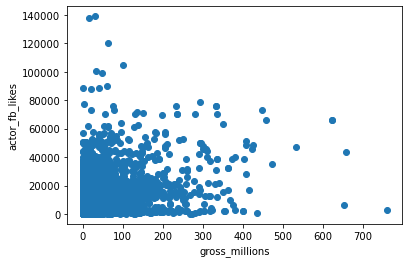

In [32]:
# remove fb likes outliers
movies_recent_trim = movies_recent[movies_recent['actor_fb_likes']<=250000].copy().reset_index()

plt.scatter(movies_recent_trim['gross_millions'], movies_recent_trim['actor_fb_likes'])
plt.xlabel("gross_millions")
plt.ylabel("actor_fb_likes")

In [34]:
movies_recent.sort_values(by = 'actor_fb_likes',ascending=False).head(10)

,index,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget_millions,gross_millions,revenue_millions,actor_fb_likes
1673,1902,Color,Adam McKay,181.0,98.0,285.0,7000.0,Will Ferrell,640000.0,84136909.0,...,26000000.0,2004.0,8000.0,7.2,1.85,0,26.00,84.14,58.14,655000.0
1109,1223,Color,David R. Ellis,221.0,82.0,160.0,748.0,Andrew Fiscella,164000.0,66466372.0,...,40000000.0,2009.0,137000.0,5.2,2.35,0,40.00,66.47,26.47,301748.0
3846,4704,Color,Travis Romero,5.0,67.0,4.0,2000.0,Lorraine Ziff,260000.0,NaN,...,625000.0,2013.0,21000.0,3.9,NaN,0,0.62,NaN,NaN,283000.0
3746,4592,Color,Johnny Remo,2.0,112.0,74.0,891.0,Randy Wayne,260000.0,96734.0,...,1000000.0,2012.0,984.0,5.6,1.85,706,1.00,0.10,-0.90,261875.0
3605,4409,NaN,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,NaN,...,17000000.0,2016.0,454.0,9.1,NaN,0,17.00,NaN,NaN,260808.0
3340,4045,Color,John Gulager,130.0,95.0,38.0,898.0,Eric Dane,164000.0,NaN,...,3200000.0,2005.0,2000.0,6.4,2.35,0,3.20,NaN,NaN,166898.0
2503,2939,Color,John Erick Dowdle,198.0,89.0,66.0,1000.0,Jay Hernandez,137000.0,31691811.0,...,12000000.0,2008.0,1000.0,6.0,1.85,0,12.00,31.69,19.69,139000.0
1973,2269,Color,Nimród Antal,107.0,88.0,190.0,163.0,Fred Ward,137000.0,15988876.0,...,27000000.0,2009.0,459.0,5.7,2.35,0,27.00,15.99,-11.01,137622.0
2073,2385,Color,Andrew Douglas,220.0,90.0,15.0,16000.0,Chloë Grace Moretz,87000.0,64255243.0,...,19000000.0,2005.0,17000.0,6.0,2.35,0,19.00,64.26,45.26,120000.0
73,74,Color,Tom Shadyac,186.0,96.0,293.0,7000.0,Morgan Freeman,87000.0,100289690.0,...,175000000.0,2007.0,11000.0,5.4,2.35,2000,175.00,100.29,-74.71,105000.0


'Anchorman: The Legend of Ron Burgundy\xa0'